In [1]:
import PyKinetic as pk
import time
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
from scipy.interpolate import BarycentricInterpolator
import seaborn as sns

In [2]:
time.time()

1761822189.8052409

In [3]:
a,b = 0,1
gaussnodes, guassweights = np.polynomial.legendre.leggauss(100)
rescaled_nodes = 0.5 * (b - a) * gaussnodes + 0.5 * (b + a)
rescaled_weights = 0.5 * (b - a) * guassweights

In [4]:
import PyKinetic as pk
import time
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
from scipy.interpolate import BarycentricInterpolator
import seaborn as sns
mean1  = 0.5
std1 = 0.01
mean2 = 0.5
std2 = 0.01
mean3  = 0.5
std3 = 0.01
mean4 = 0.2
std4 = 0.01
mean5 = 0.8
std5 = 0.01
def init1(x):
    # print(x)
    return np.exp(-(x-mean1)**2/std1 )
def init2(x):
    return np.exp(-(x-mean2)**2/std2)
def init3(x):
    return np.exp(-(x-mean3)**2/std3)
def init4(x):
    return np.exp(-(x-mean4)**2/std4)  + np.exp(-(x-0.8)**2/std4)
def init5(x):
    return np.exp(-(x-mean5)**2/std5)

for T in [ pk.TransitionLeft(0.45), pk.TransitionRight(0.4), pk.TransitionAway(0.4, 0.5)]:
    err = [] 
    n = 150
    print(n, end = '\r')
    
    KS2parts1 = pk.KineticSystem(2)
    KS2parts1.AddInteraction(1,2,1, pk.OneFunc, T ) 
    stime = time.time()
    KS2parts1.Interpolate(n)
    # time.sleep(1)
    precomp = time.time()
    KS2parts1.Solve([init1, init2], limit_time= 20)
    soltime = time.time()


    print(precomp - stime, soltime - precomp, (precomp - stime)/(soltime- stime))

2.7672109603881836 1.2451281547546387 0.6896752445336821
2.8041749000549316 1.1879067420959473 0.7024342564657773
4.675969362258911 1.3002192974090576 0.7824333582063829


In [5]:
time.time()

1761822203.846847

In [6]:

for T in [ pk.TransitionLeft(0.45), pk.TransitionRight(0.4), pk.TransitionAway(0.4, 0.5)]:
    err = [] 
    n = 100
    print(n, end = '\r')
    
    KS2parts1 = pk.KineticSystem(2)
    KS2parts1.AddInteraction(1,2,1, pk.OneFunc, T ) 
    stime = time.time()
    KS2parts1.Interpolate(n)
    precomp =  time.time()
    KS2parts1.Solve([init1, init2], limit_time= 20)
    soltime = time.time()


    print(precomp - stime, soltime-precomp, (soltime-precomp)/(soltime - stime))


0.997366189956665 0.4128549098968506 0.292758993564722
1.0977160930633545 0.5261590480804443 0.3240144730030395
1.6100621223449707 0.35309314727783203 0.1798600206216367


In [7]:
precomp

1761822208.5046

In [8]:

a,b = 0,1
gaussnodes, guassweights = np.polynomial.legendre.leggauss(100)
rescaled_nodes = 0.5 * (b - a) * gaussnodes + 0.5 * (b + a)
rescaled_weights = 0.5 * (b - a) * guassweights
mean1  = 0.5
std1 = 0.01
mean2 = 0.5
std2 = 0.01
mean3  = 0.5
std3 = 0.01
mean4 = 0.2
std4 = 0.01
mean5 = 0.8
std5 = 0.01
def init1(x):
    # print(x)
    return np.exp(-(x-mean1)**2/std1 )
def init2(x):
    return np.exp(-(x-mean2)**2/std2)

errs = []
ts = np.linspace(0,20, 200)
nodenum = 101
for T in [ pk.TransitionLeft(0.45), pk.TransitionRight(0.4), pk.TransitionAway(0.4, 0.5)]:
    err = []
    for n in range(1,nodenum):
        print(n, end = '\r')
        KS2parts1 = pk.KineticSystem(2)
        KS2parts1.AddInteraction(1,2,1, pk.OneFunc, T ) 
        KS2parts1.Interpolate(n)
        KS2parts1.Solve([init1, init2], limit_time= 20)
        n1_sol = np.array([BarycentricInterpolator(KS2parts1.InterpolationNodes, KS2parts1.Solutions[0][int(np.floor(t*(KS2parts1.num_time_points-1)/KS2parts1.limit_time)),:len(KS2parts1.InterpolationNodes)])(rescaled_nodes) for t in ts])
        KS2parts2 = pk.KineticSystem(2)
        KS2parts2.AddInteraction(1,2,1, pk.OneFunc, T) 
        KS2parts2.Interpolate(2*n)
        KS2parts2.Solve([init1, init2], limit_time= 20)
        n2_sol = np.array([BarycentricInterpolator(KS2parts2.InterpolationNodes, KS2parts2.Solutions[0][int(np.floor(t*(KS2parts2.num_time_points-1)/KS2parts2.limit_time)),:len(KS2parts2.InterpolationNodes)])(rescaled_nodes) for t in ts])
        errn = np.abs(n1_sol - n2_sol)
        errn = np.sum(errn*rescaled_weights[None, :], axis = 1)
        # print(errn)
        err += [np.max(errn)]
    errs += [err]


C:\Users\yassin\AppData\Roaming\Python\Python39\site-packages\scipy\interpolate\_polyint.py:550: RuntimeWarning: divide by zero encountered in double_scalars
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
C:\Users\yassin\AppData\Roaming\Python\Python39\site-packages\scipy\interpolate\_polyint.py:557: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


In [9]:
T = pk.TransitionToward(0.4, 0.5)
def init1(x):
    # print(x)
    return 0.5*np.exp(-(x-0.1)**2/std1 ) + 0.5*np.exp(-(x-0.9)**2/std1 )
err = []
for n in range(1,nodenum):
    print(n, end = '\r')
    KS2parts1 = pk.KineticSystem(2)
    KS2parts1.AddInteraction(1,2,1, pk.OneFunc, T ) 
    KS2parts1.Interpolate(n)
    KS2parts1.Solve([init1, init2], limit_time= 20)
    n1_sol = np.array([BarycentricInterpolator(KS2parts1.InterpolationNodes, KS2parts1.Solutions[0][int(np.floor(t*(KS2parts1.num_time_points-1)/KS2parts1.limit_time)),:len(KS2parts1.InterpolationNodes)])(rescaled_nodes) for t in ts])
    KS2parts2 = pk.KineticSystem(2)
    KS2parts2.AddInteraction(1,2,1, pk.OneFunc, T) 
    KS2parts2.Interpolate(2*n)
    KS2parts2.Solve([init1, init2], limit_time= 20)
    n2_sol = np.array([BarycentricInterpolator(KS2parts2.InterpolationNodes, KS2parts2.Solutions[0][int(np.floor(t*(KS2parts2.num_time_points-1)/KS2parts2.limit_time)),:len(KS2parts2.InterpolationNodes)])(rescaled_nodes) for t in ts])
    errn = np.abs(n1_sol - n2_sol)
    errn = np.sum(errn*rescaled_weights[None, :], axis = 1)
    # print(errn)
    err += [np.max(errn)]
errs += [err]
# errs[-1]= err

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


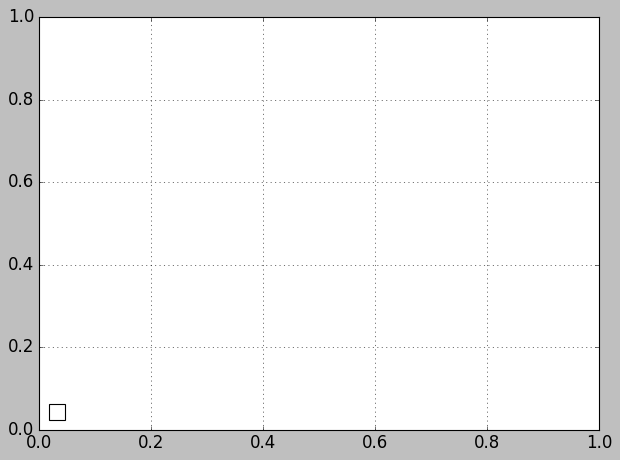

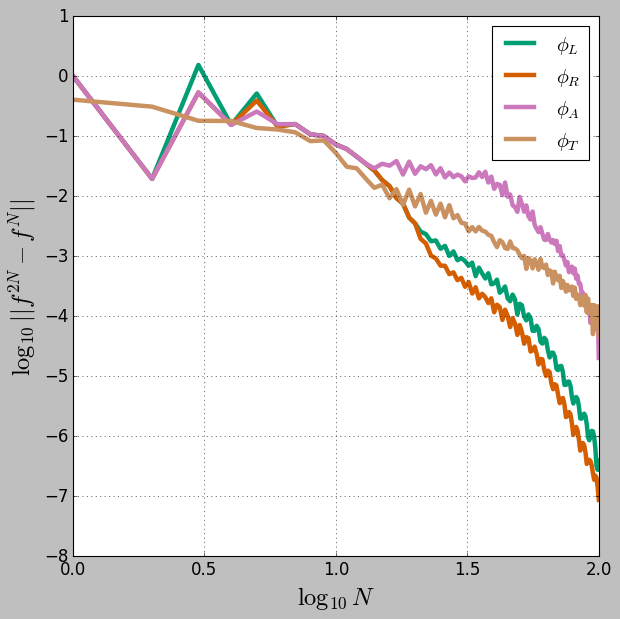

In [10]:
plt.style.use('classic')
Pts = np.linspace(0,1,100+1)
lim = 15
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams.update({'font.size': 15})

plt.grid(linestyle='dotted')
# plt.legend(ncol=2, loc=9) # 9 means top center
# plt.title('Com')
plt.tight_layout()
plt.legend(loc="lower left")

pallette = sns.color_palette("colorblind", n_colors=8)
phis = ['$\phi_L$', '$\phi_R$', '$\phi_A$', '$\phi_T$']
plt.figure(figsize=(8, 8))

for i in range(0, len(phis)):                                                                       
    plt.plot(np.log10(np.array([n for n in range(1,nodenum)])), np.log10(np.array(errs[i])), color = pallette[i+2], label = phis[i], linewidth=4)
# plt.xticks(fontsize=22)
# plt.yticks(fontsize=22)
plt.rcParams.update({'font.size':15})
plt.gca().relim()  # Recalculate limits
plt.gca().autoscale_view() 
plt.grid(linestyle='dotted')
# plt.legend(ncol=1, loc=2) # 9 means top center | 2 means top left
# plt.title('f'+str(i), fontsize = 22)
plt.xlabel('$\log_{10}{N}$', fontsize =22)
plt.ylabel('$\log_{10}{||f^{2N}-f^{N}||}$', fontsize=22)
plt.tight_layout()
plt.legend()
plt.savefig('error_new.jpg', dpi = 500)
plt.show()

In [11]:
np.log(200)

5.298317366548036

In [12]:
mean1  = 0.5
std1 = 0.01
mean2 = 0.5
std2 = 0.01
mean3  = 0.5
std3 = 0.01
mean4 = 0.2
std4 = 0.01
mean5 = 0.8
std5 = 0.01
def init1(x):
    # print(x)
    return np.exp(-(x-mean1)**2/std1 )
def init2(x):
    return np.exp(-(x-mean2)**2/std2)
a,b = 0,1
gaussnodes, guassweights = np.polynomial.legendre.leggauss(100)
rescaled_nodes = 0.5 * (b - a) * gaussnodes + 0.5 * (b + a)
rescaled_weights = 0.5 * (b - a) * guassweights
mean1  = 0.5
std1 = 0.01
mean2 = 0.5
std2 = 0.01
mean3  = 0.5
std3 = 0.01
mean4 = 0.2
std4 = 0.01
mean5 = 0.8
std5 = 0.01
def init1(x):
    # print(x)
    return np.exp(-(x-mean1)**2/std1 )
def init2(x):
    return np.exp(-(x-mean2)**2/std2)

errs = []
ts = np.linspace(0,20, 200)
nodenum = 101
for T1,T2 in [ (pk.TransitionLeft(0.45),pk.TransitionLeft(0.45)) , (pk.TransitionRight(0.4), pk.TransitionLeft(0.45))]:
    err = []
    for n in range(1,nodenum):
        print(n, end = '\r')
        KS2parts1 = pk.KineticSystem(2)
        KS2parts1.AddInteraction(1,2,1, pk.OneFunc, T1 ) 
        KS2parts1.AddInteraction(2,1,2, pk.OneFunc, T2 ) 
        KS2parts1.Interpolate(n)
        KS2parts1.Solve([init1, init2], limit_time= 20)
        n1_sol = np.array([BarycentricInterpolator(KS2parts1.InterpolationNodes, KS2parts1.Solutions[0][int(np.floor(t*(KS2parts1.num_time_points-1)/KS2parts1.limit_time)),:len(KS2parts1.InterpolationNodes)])(rescaled_nodes) for t in ts])
        KS2parts2 = pk.KineticSystem(2)
        KS2parts2.AddInteraction(1,2,1, pk.OneFunc, T1 ) 
        KS2parts2.AddInteraction(2,1,2, pk.OneFunc, T2 ) 
        KS2parts2.Interpolate(2*n)
        KS2parts2.Solve([init1, init2], limit_time= 20)
        n2_sol = np.array([BarycentricInterpolator(KS2parts2.InterpolationNodes, KS2parts2.Solutions[0][int(np.floor(t*(KS2parts2.num_time_points-1)/KS2parts2.limit_time)),:len(KS2parts2.InterpolationNodes)])(rescaled_nodes) for t in ts])
        errn = np.abs(n1_sol - n2_sol)
        errn = np.sum(errn*rescaled_weights[None, :], axis = 1)
        # print(errn)
        err += [np.max(errn)]
    errs += [err]


C:\Users\yassin\AppData\Roaming\Python\Python39\site-packages\scipy\interpolate\_polyint.py:550: RuntimeWarning: divide by zero encountered in double_scalars
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
C:\Users\yassin\AppData\Roaming\Python\Python39\site-packages\scipy\interpolate\_polyint.py:557: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


In [13]:
T1 = pk.TransitionToward(0.4, 0.5)
T2 =  pk.TransitionAway(0.4, 0.5)
def init1(x):
    # print(x)
    return 0.5*np.exp(-(x-0.1)**2/std1 ) + 0.5*np.exp(-(x-0.9)**2/std1 )

err = []
for n in range(1,nodenum):
    print(n, end = '\r')
    KS2parts1 = pk.KineticSystem(2)
    KS2parts1.AddInteraction(1,2,1, pk.OneFunc, T1 )
    KS2parts1.AddInteraction(2,1,2, pk.OneFunc, T2 )
    KS2parts1.Interpolate(n)
    KS2parts1.Solve([init1, init2], limit_time= 20)
    n1_sol = np.array([BarycentricInterpolator(KS2parts1.InterpolationNodes, KS2parts1.Solutions[0][int(np.floor(t*(KS2parts1.num_time_points-1)/KS2parts1.limit_time)),:len(KS2parts1.InterpolationNodes)])(rescaled_nodes) for t in ts])
    KS2parts2 = pk.KineticSystem(2)
    KS2parts2.AddInteraction(1,2,1, pk.OneFunc, T1 )
    KS2parts2.AddInteraction(2,1,2, pk.OneFunc, T2 )
    KS2parts2.Interpolate(2*n)
    KS2parts2.Solve([init1, init2], limit_time= 20)
    n2_sol = np.array([BarycentricInterpolator(KS2parts2.InterpolationNodes, KS2parts2.Solutions[0][int(np.floor(t*(KS2parts2.num_time_points-1)/KS2parts2.limit_time)),:len(KS2parts2.InterpolationNodes)])(rescaled_nodes) for t in ts])
    errn = np.abs(n1_sol - n2_sol)
    errn = np.sum(errn*rescaled_weights[None, :], axis = 1)
    # print(errn)
    err += [np.max(errn)]
errs += [err]
# errs[-1]= err

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


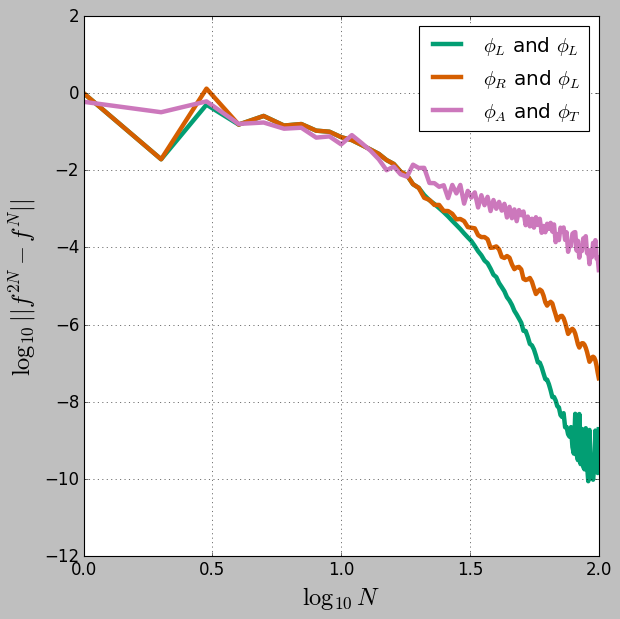

In [14]:
pallette = sns.color_palette("colorblind", n_colors=8)
phis = ['$\phi_L$ and $\phi_L$', '$\phi_R$ and $\phi_L$', '$\phi_A$ and $\phi_T$']
plt.figure(figsize=(8, 8))
plt.style.use('classic')
Pts = np.linspace(0,1,100+1)
lim = 15
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams.update({'font.size': 15})

plt.grid(linestyle='dotted')
# plt.legend(ncol=2, loc=9) # 9 means top center
# plt.title('Com')
plt.tight_layout()
plt.legend(loc="lower left")
for i in range(0, len(phis)):                                                                       
    plt.plot(np.log10(np.array([n for n in range(1,nodenum)])), np.log10(np.array(errs[i])), color = pallette[i+2], label = phis[i], linewidth=4)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
plt.rcParams.update({'font.size':15})
plt.gca().relim()  # Recalculate limits
plt.gca().autoscale_view() 
plt.grid(linestyle='dotted')
# plt.legend(ncol=1, loc=2) # 9 means top center | 2 means top left
# plt.title('f'+str(i), fontsize = 22)
plt.xlabel('$\log_{10}{N}$', fontsize =22)
plt.ylabel('$\log_{10}{||f^{2N}-f^{N}||}$', fontsize=22)
plt.tight_layout()
plt.legend()
plt.savefig('error_new2.jpg', dpi = 500)
plt.show()

In [15]:

a,b = 0,1
gaussnodes, guassweights = np.polynomial.legendre.leggauss(100)
rescaled_nodes = 0.5 * (b - a) * gaussnodes + 0.5 * (b + a)
rescaled_weights = 0.5 * (b - a) * guassweights
mean1  = 0.5
std1 = 0.01
mean2 = 0.5
std2 = 0.01
mean3  = 0.5
std3 = 0.01
mean4 = 0.2
std4 = 0.01
mean5 = 0.8
std5 = 0.01
def init1(x):
    # print(x)
    return np.exp(-(x-mean1)**2/std1 )
def init2(x):
    return np.exp(-(x-mean2)**2/std2)
def init3(x):
    return np.exp(-(x-mean3)**2/std3)
def init4(x):
    return np.exp(-(x-mean4)**2/std4)  + np.exp(-(x-0.8)**2/std4)
def init5(x):
    return np.exp(-(x-mean5)**2/std5)


errs = []
ts = np.linspace(0,20, 200)
nodenum = 101
for T in [ pk.TransitionLeft(0.45), pk.TransitionRight(0.4), pk.TransitionAway(0.4, 0.5)]:
    err = []
    for n in range(1,nodenum):
        print(n, end = '\r')
        KS5parts1 = pk.KineticSystem(5)\
        #f1
        KS5parts1.AddInteraction(1,2,1, pk.OneFunc, pk.TransitionLeft(0.4)) 
        KS5parts1.AddInteraction(3,4,1, pk.OneFunc, pk.TransitionRight(0.5)) 
        #f2
        KS5parts1.AddInteraction(2,3,2, pk.OneFunc, pk.TransitionAway(0.5,0.5)) 
        #f3
        KS5parts1.AddInteraction(2,4,3, pk.OneFunc, pk.TransitionLeft(0.2)) 
        #f4
        # KS5parts1.AddInteraction(4,1,4, pk.OneFunc, pk.TransitionToward(0.3,0.5)) 
        #f5
        # KS5parts1.AddInteraction(5,5,5, pk.OneFunc, pk.TransitionLeft(0.4)) 
        KS5parts1.Interpolate(n)
        KS5parts1.Solve([init1, init2, init3, init4, init5], limit_time= 20)
        n1_sol = np.array([BarycentricInterpolator(KS5parts1.InterpolationNodes, KS5parts1.Solutions[0][int(np.floor(t*(KS5parts1.num_time_points-1)/KS5parts1.limit_time)),:len(KS5parts1.InterpolationNodes)])(rescaled_nodes) for t in ts])
        KS5parts2 = pk.KineticSystem(5)
         #f1
        KS5parts2.AddInteraction(1,2,1, pk.OneFunc, pk.TransitionLeft(0.4)) 
        KS5parts2.AddInteraction(3,4,1, pk.OneFunc, pk.TransitionRight(0.5)) 
        #f2
        KS5parts2.AddInteraction(2,3,2, pk.OneFunc, pk.TransitionAway(0.5,0.5)) 
        #f3
        KS5parts2.AddInteraction(2,4,3, pk.OneFunc, pk.TransitionLeft(0.2)) 
        #f4
        # KS5parts2.AddInteraction(4,1,4, pk.OneFunc, pk.TransitionToward(0.3,0.5)) 
        #f5
        # KS5parts2.AddInteraction(5,5,5, pk.OneFunc, pk.TransitionLeft(0.4))
        KS5parts2.Interpolate(2*n)
        KS5parts2.Solve([init1, init2, init3, init4, init5], limit_time= 20)
        n2_sol = np.array([BarycentricInterpolator(KS5parts2.InterpolationNodes, KS5parts2.Solutions[0][int(np.floor(t*(KS5parts2.num_time_points-1)/KS5parts2.limit_time)),:len(KS5parts2.InterpolationNodes)])(rescaled_nodes) for t in ts])
        errn = np.abs(n1_sol - n2_sol)
        errn = np.sum(errn*rescaled_weights[None, :], axis = 1)
        # print(errn)
        err += [np.max(errn)]
    errs += [err]


C:\Users\yassin\AppData\Roaming\Python\Python39\site-packages\scipy\interpolate\_polyint.py:550: RuntimeWarning: divide by zero encountered in double_scalars
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
C:\Users\yassin\AppData\Roaming\Python\Python39\site-packages\scipy\interpolate\_polyint.py:557: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


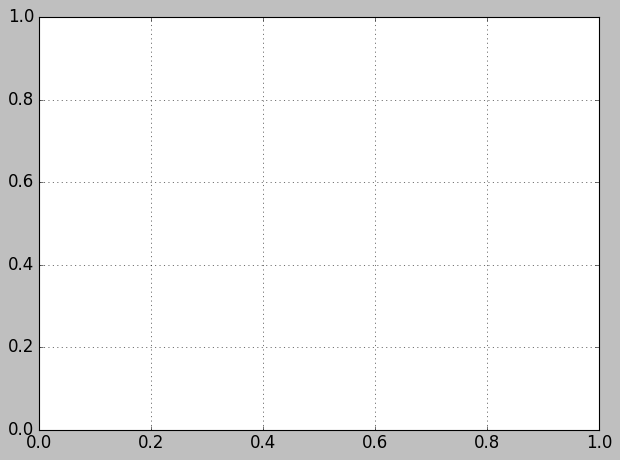

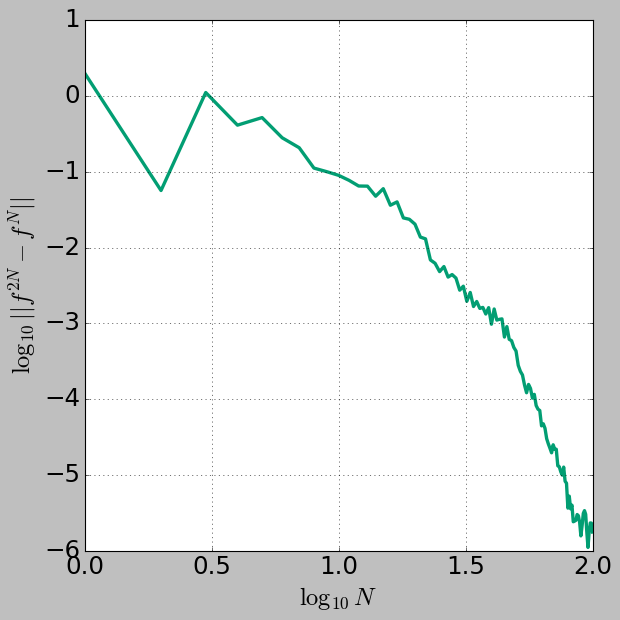

In [16]:
plt.style.use('classic')
Pts = np.linspace(0,1,100+1)
lim = 15
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams.update({'font.size': 15})

plt.grid(linestyle='dotted')
# plt.legend(ncol=2, loc=9) # 9 means top center
# plt.title('Com')
plt.tight_layout()
# plt.legend(loc="lower left")

pallette = sns.color_palette("colorblind", n_colors=8)
phis = ['$\phi_L$', '$\phi_R$', '$\phi_A$', '$\phi_T$']
plt.figure(figsize=(8, 8))

i=0                                                                    
plt.plot(np.log10(np.array([n for n in range(1,nodenum)])), np.log10(np.array(errs[i])), color = pallette[i+2], linewidth=3)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


plt.rcParams.update({'font.size':15})
plt.gca().relim()  # Recalculate limits
plt.gca().autoscale_view() 
plt.grid(linestyle='dotted')
# plt.legend(ncol=1, loc=2) # 9 means top center | 2 means top left
# plt.title('f'+str(i), fontsize = 22)
plt.xlabel('$\log_{10}{N}$', fontsize =22)
plt.ylabel('$\log_{10}{||f^{2N}-f^{N}||}$', fontsize=22)
plt.tight_layout()
# plt.legend()
# plt.legend()
plt.savefig('error_new5.jpg', dpi = 500)
plt.show()